# Draft Combine Sheets

The NBA Draft Combine is an event that brings amateur athletes together to participate in drills, interview with teams, and showcase their skills prior to the NBA Draft. The athletes go through physical measurements, basketball drills, and medical testing. The [stats.nba.com](https://stats.nba.com) API contains the `draftcombinestats` endpoint that has much of the data recorded at the combine.

This notebook leverages the `Draft` class from the `py_ball` package to explore the `draftcombinestats` endpoint with the goal of producing player sheets that summarize the performance of athletes at the combine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_ball import draft

HEADERS = {'Connection': 'close',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2)' + \
                         'AppleWebKit/537.36 (KHTML, like Gecko) ' + \
                         'Chrome/66.0.3359.117 Safari/537.36'}

pd.options.mode.chained_assignment = None  # default='warn'

The `league_id` and `season_year` are required parameters for the `draftcombinestats` endpoint. The NBA is the only league for which data are available, and the cell below pulls data for the most recent draft combine (2018-19 season).

In [2]:
league_id = '00' #NBA
season_year = '2018-19'
draft_data = draft.Draft(headers=HEADERS,
                         endpoint='draftcombinestats',
                         league_id=league_id,
                         season_year=season_year)
draft_df = pd.DataFrame(draft_data.data['DraftCombineStats'])
draft_df.head(10)

,BENCH_PRESS,BODY_FAT_PCT,FIRST_NAME,HAND_LENGTH,HAND_WIDTH,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,LANE_AGILITY_TIME,...,SPOT_NBA_CORNER_LEFT,SPOT_NBA_CORNER_RIGHT,SPOT_NBA_TOP_KEY,STANDING_REACH,STANDING_REACH_FT_IN,STANDING_VERTICAL_LEAP,THREE_QUARTER_SPRINT,WEIGHT,WINGSPAN,WINGSPAN_FT_IN
0,10.0,8.90,Rawle,8.50,10.00,74.75,6' 2.75'',76.25,6' 4.25'',11.50,...,1-5,2-5,3-5,99.0,8' 3'',32.5,3.15,217.4,80.75,6' 8.75''
1,NaN,5.55,Grayson,8.25,10.00,75.00,6' 3'',76.50,6' 4.5'',10.31,...,None,None,None,97.0,8' 1'',32.5,3.15,198,79.25,6' 7.25''
2,0.0,5.00,Kostas,9.25,9.50,81.00,6' 9'',82.50,6' 10.5'',12.48,...,2-5,4-5,3-5,110.0,9' 2'',29.5,3.21,194.8,86.25,7' 2.25''
3,11.0,7.95,Udoka,9.50,10.00,82.00,6' 10'',84.25,7' 0.25'',12.97,...,None,None,None,112.5,9' 4.5'',31.0,3.12,273.8,91.00,7' 7''
4,NaN,6.20,Mohamed,9.75,10.25,83.25,6' 11.25'',84.75,7' 0.75'',NaN,...,None,None,None,115.5,9' 7.5'',NaN,NaN,225.6,94.00,7' 10''
5,7.0,11.65,Jaylen,8.00,8.25,73.25,6' 1.25'',74.25,6' 2.25'',11.39,...,4-5,3-5,1-5,96.5,8' 0.5'',27.0,3.31,207.6,75.50,6' 3.5''
6,11.0,5.35,Keita,9.00,8.50,79.25,6' 7.25'',80.50,6' 8.5'',11.20,...,3-5,4-5,1-5,106.5,8' 10.5'',30.5,3.17,223.8,87.25,7' 3.25''
7,9.0,4.00,Tyus,8.50,9.25,77.00,6' 5'',78.75,6' 6.75'',11.04,...,4-5,4-5,4-5,102.0,8' 6'',32.0,3.07,200.2,81.00,6' 9''
8,0.0,7.60,Brian,9.00,10.00,78.25,6' 6.25'',79.50,6' 7.5'',11.58,...,3-5,2-5,2-5,103.5,8' 7.5'',30.5,3.28,202,82.25,6' 10.25''
9,NaN,5.90,Miles,9.00,9.75,77.25,6' 5.25'',78.75,6' 6.75'',NaN,...,None,None,None,103.5,8' 7.5'',NaN,NaN,220.4,81.50,6' 9.5''


The `draft_df` DataFrame has 47 columns, and the view above does not allow one to see all of the feature names. The cell below lists them all.

In [3]:
list(draft_df)

['BENCH_PRESS',
 'BODY_FAT_PCT',
 'FIRST_NAME',
 'HAND_LENGTH',
 'HAND_WIDTH',
 'HEIGHT_WO_SHOES',
 'HEIGHT_WO_SHOES_FT_IN',
 'HEIGHT_W_SHOES',
 'HEIGHT_W_SHOES_FT_IN',
 'LANE_AGILITY_TIME',
 'LAST_NAME',
 'MAX_VERTICAL_LEAP',
 'MODIFIED_LANE_AGILITY_TIME',
 'OFF_DRIB_COLLEGE_BREAK_LEFT',
 'OFF_DRIB_COLLEGE_BREAK_RIGHT',
 'OFF_DRIB_COLLEGE_TOP_KEY',
 'OFF_DRIB_FIFTEEN_BREAK_LEFT',
 'OFF_DRIB_FIFTEEN_BREAK_RIGHT',
 'OFF_DRIB_FIFTEEN_TOP_KEY',
 'ON_MOVE_COLLEGE',
 'ON_MOVE_FIFTEEN',
 'PLAYER_ID',
 'PLAYER_NAME',
 'POSITION',
 'SEASON',
 'SPOT_COLLEGE_BREAK_LEFT',
 'SPOT_COLLEGE_BREAK_RIGHT',
 'SPOT_COLLEGE_CORNER_LEFT',
 'SPOT_COLLEGE_CORNER_RIGHT',
 'SPOT_COLLEGE_TOP_KEY',
 'SPOT_FIFTEEN_BREAK_LEFT',
 'SPOT_FIFTEEN_BREAK_RIGHT',
 'SPOT_FIFTEEN_CORNER_LEFT',
 'SPOT_FIFTEEN_CORNER_RIGHT',
 'SPOT_FIFTEEN_TOP_KEY',
 'SPOT_NBA_BREAK_LEFT',
 'SPOT_NBA_BREAK_RIGHT',
 'SPOT_NBA_CORNER_LEFT',
 'SPOT_NBA_CORNER_RIGHT',
 'SPOT_NBA_TOP_KEY',
 'STANDING_REACH',
 'STANDING_REACH_FT_IN',
 'STANDING_VE

Examining the list above contains about four categories for features:
- Player metadata (`FIRST_NAME`, `LAST_NAME`, `POSITION`, etc.)
- Measurement data (`HAND_LENGTH`, `HAND_WIDTH`, `HEIGHT_WO_SHOES`, etc.)
- Drill data (`BENCH_PRESS`, `LANE_AGILITY_TIME`, `MAX_VERTICAL_LEAP`, etc.)
- Shooting data (`OFF_DRIB_COLLEGE_BREAK_LEFT`, `SPOT_FIFTEEN_BREAK_LEFT`, `SPOT_NBA_TOP_KEY`, etc.)

All of this information seems relevant to include on a player summary sheet. The following sections will organize and manipulate the data so as to produce meaningful results for each data category.

## Player Metadata

The player metadata seems to be the simplest category. The only change necessary would be to create a `FULL_NAME` field.

In [4]:
draft_df['FULL_NAME'] = draft_df['FIRST_NAME'] + ' ' + draft_df['LAST_NAME']

## Measurement Data

Measurement data provide a sense of the size and potentially the fitness of an athlete. Due to the nature of NBA positions, players are effective across a wide variety of values of measurement data. This leads to the motivation to present not only the absolute value of measurement data values, but also values normalized by position. Such data transforming illustrates how players compare physically to others that play the same position.

First, the code below explores the measurement data.

In [5]:
measurement_df = draft_df[['PLAYER_ID', 'FULL_NAME', 'POSITION', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH',
                           'HEIGHT_WO_SHOES', 'HEIGHT_WO_SHOES_FT_IN', 'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN',
                           'STANDING_REACH', 'STANDING_REACH_FT_IN', 'WEIGHT', 'WINGSPAN', 'WINGSPAN_FT_IN']]
measurement_df.head(20)

,PLAYER_ID,FULL_NAME,POSITION,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN
0,1628959,Rawle Alkins,SG,8.90,8.50,10.00,74.75,6' 2.75'',76.25,6' 4.25'',99.0,8' 3'',217.4,80.75,6' 8.75''
1,1628960,Grayson Allen,SG,5.55,8.25,10.00,75.00,6' 3'',76.50,6' 4.5'',97.0,8' 1'',198,79.25,6' 7.25''
2,1628961,Kostas Antetokounmpo,PF,5.00,9.25,9.50,81.00,6' 9'',82.50,6' 10.5'',110.0,9' 2'',194.8,86.25,7' 2.25''
3,1628962,Udoka Azubuike,C,7.95,9.50,10.00,82.00,6' 10'',84.25,7' 0.25'',112.5,9' 4.5'',273.8,91.00,7' 7''
4,1628964,Mohamed Bamba,C,6.20,9.75,10.25,83.25,6' 11.25'',84.75,7' 0.75'',115.5,9' 7.5'',225.6,94.00,7' 10''
5,1628965,Jaylen Barford,PG-SG,11.65,8.00,8.25,73.25,6' 1.25'',74.25,6' 2.25'',96.5,8' 0.5'',207.6,75.50,6' 3.5''
6,1628966,Keita Bates-Diop,SG-SF,5.35,9.00,8.50,79.25,6' 7.25'',80.50,6' 8.5'',106.5,8' 10.5'',223.8,87.25,7' 3.25''
7,1628967,Tyus Battle,SG,4.00,8.50,9.25,77.00,6' 5'',78.75,6' 6.75'',102.0,8' 6'',200.2,81.00,6' 9''
8,1628968,Brian Bowen,SG-SF,7.60,9.00,10.00,78.25,6' 6.25'',79.50,6' 7.5'',103.5,8' 7.5'',202,82.25,6' 10.25''
9,1628970,Miles Bridges,SF,5.90,9.00,9.75,77.25,6' 5.25'',78.75,6' 6.75'',103.5,8' 7.5'',220.4,81.50,6' 9.5''


Conveniently, many of the measurements have both a value in inches, along with a display-friendly format. Also of note if the format of the `POSITION` field. It appears that players can have multiple positions listed, complicating our plan to normalize by `POSITION` slightly. The following cell drills down into this field further.

In [6]:
measurement_df.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C         7
C-PF      3
PF        7
PF-C      4
PG       13
PG-SG     1
SF        5
SF-PF     1
SF-SG     4
SG       14
SG-PG     4
SG-SF     6
Name: PLAYER_ID, dtype: int64

This is speculation, but the primary position of a player appears to be listed first. Due to the sparsity of some of these positions (including one `SF-PF`), grouping the players to a single, primary position may lead to more meaningful comparisons.

In [7]:
primary_positions = [pos if '-' not in pos else pos.split('-')[0]
                     for pos in measurement_df['POSITION']]

measurement_df.loc[:, 'PRIMARY_POSITION'] = primary_positions
measurement_df.groupby('PRIMARY_POSITION')['PLAYER_ID'].nunique()

PRIMARY_POSITION
C     10
PF    11
PG    14
SF    10
SG    24
Name: PLAYER_ID, dtype: int64

While 10 players may not be enough diversity to create meaningful comparisons through normalized values, the `PRIMARY_POSITION` field should be robust enough for an attempt. Also, before normalizing, checking for any `NULL` of missing values is necessary.

In [8]:
measurement_df.isnull().sum()

PLAYER_ID                0
FULL_NAME                0
POSITION                 0
BODY_FAT_PCT             0
HAND_LENGTH              0
HAND_WIDTH               0
HEIGHT_WO_SHOES          0
HEIGHT_WO_SHOES_FT_IN    0
HEIGHT_W_SHOES           0
HEIGHT_W_SHOES_FT_IN     0
STANDING_REACH           0
STANDING_REACH_FT_IN     0
WEIGHT                   0
WINGSPAN                 0
WINGSPAN_FT_IN           0
PRIMARY_POSITION         0
dtype: int64

In [9]:
measurement_df['WEIGHT'] = pd.to_numeric(measurement_df['WEIGHT'])
normed_measurement_df = measurement_df[['PRIMARY_POSITION', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH',
                                        'HEIGHT_WO_SHOES', 'HEIGHT_W_SHOES', 'STANDING_REACH', 'WEIGHT', 'WINGSPAN']]
normed_measurement_df = normed_measurement_df.groupby('PRIMARY_POSITION').transform(lambda x: (x - x.mean()) / x.std())

normed_measurement_df.columns = [orig_name + '_NORM' for orig_name in list(normed_measurement_df)]
normed_measurement_df.head(5)

,BODY_FAT_PCT_NORM,HAND_LENGTH_NORM,HAND_WIDTH_NORM,HEIGHT_WO_SHOES_NORM,HEIGHT_W_SHOES_NORM,STANDING_REACH_NORM,WEIGHT_NORM,WINGSPAN_NORM
0,1.768988,-0.474610,1.137398,-0.997443,-0.803904,-0.637884,1.734402,-0.151685
1,-0.488578,-1.350814,1.137398,-0.817453,-0.633163,-1.476746,-0.267426,-0.775762
2,-0.846523,0.253694,-0.301511,0.918832,0.976156,1.238708,-1.800286,0.068679
3,-0.066659,0.255377,0.048100,0.065372,0.495715,0.881581,1.015253,0.974858
4,-0.664885,0.766131,0.529102,0.719092,0.743573,2.057023,-1.132912,1.888787


In [10]:
measurement_df = measurement_df.merge(normed_measurement_df, left_index=True, right_index=True)
measurement_df.head(5)

,PLAYER_ID,FULL_NAME,POSITION,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,...,WINGSPAN_FT_IN,PRIMARY_POSITION,BODY_FAT_PCT_NORM,HAND_LENGTH_NORM,HAND_WIDTH_NORM,HEIGHT_WO_SHOES_NORM,HEIGHT_W_SHOES_NORM,STANDING_REACH_NORM,WEIGHT_NORM,WINGSPAN_NORM
0,1628959,Rawle Alkins,SG,8.90,8.50,10.00,74.75,6' 2.75'',76.25,6' 4.25'',...,6' 8.75'',SG,1.768988,-0.474610,1.137398,-0.997443,-0.803904,-0.637884,1.734402,-0.151685
1,1628960,Grayson Allen,SG,5.55,8.25,10.00,75.00,6' 3'',76.50,6' 4.5'',...,6' 7.25'',SG,-0.488578,-1.350814,1.137398,-0.817453,-0.633163,-1.476746,-0.267426,-0.775762
2,1628961,Kostas Antetokounmpo,PF,5.00,9.25,9.50,81.00,6' 9'',82.50,6' 10.5'',...,7' 2.25'',PF,-0.846523,0.253694,-0.301511,0.918832,0.976156,1.238708,-1.800286,0.068679
3,1628962,Udoka Azubuike,C,7.95,9.50,10.00,82.00,6' 10'',84.25,7' 0.25'',...,7' 7'',C,-0.066659,0.255377,0.048100,0.065372,0.495715,0.881581,1.015253,0.974858
4,1628964,Mohamed Bamba,C,6.20,9.75,10.25,83.25,6' 11.25'',84.75,7' 0.75'',...,7' 10'',C,-0.664885,0.766131,0.529102,0.719092,0.743573,2.057023,-1.132912,1.888787


Now, the `measurement_df` DataFrame contains both absolute and normalized values of the measurement data. Because the goal is to produce a sheet for each player, a function to visualize both of these values for each feature would be valuable. `display_measurement_data` is a function that does just that.

In [11]:
def display_data(player_id, display_data, feature, drills=False):
    """ display_data ingests a player_id and a feature
    in order to produce a relevant visualization.

    @param player_id (int): Unique player identifier
    @param measurement_data (DataFrame): DataFrame containing both
        normalized and absolute values of draft measurement data
    @param feature (str): String corresponding to the feature
        to visualize

    Returns:

        fig (matplotlib.figure.Figure): Figure object visualizing
            the feature of interest
    """

    player_df = display_data[display_data['PLAYER_ID']==player_id]
    position = player_df['PRIMARY_POSITION'].iloc[0]

    if feature in ['HEIGHT_W_SHOES', 'HEIGHT_WO_SHOES', 'STANDING_REACH', 'WINGSPAN']:
        other_feature = feature + '_FT_IN'
        units = ''
    elif feature in ['HAND_LENGTH', 'HAND_WIDTH', 'MAX_VERTICAL_LEAP', 'STANDING_VERTICAL_LEAP']:
        other_feature = feature
        units = ' in'
    elif feature == 'WEIGHT':
        other_feature = feature
        units = ' lbs'
    elif feature == 'BODY_FAT_PCT':
        other_feature = feature
        units = '%'
    elif feature in ['LANE_AGILITY_TIME', 'MODIFIED_LANE_AGILITY_TIME', 'THREE_QUARTER_SPRINT']:
        other_feature = feature
        units = ' s'
    elif feature == 'BENCH_PRESS':
        other_feature = feature
        units = ' reps'

    abs_value = str(player_df[other_feature].iloc[0]) + units
    normed_value = player_df[feature + '_NORM'].iloc[0]
    figure_title = other_feature + ': ' + abs_value

    if drills:
        position_df = display_data[pd.notnull(display_data[feature + '_NORM'])]
        position = ''
    else:
        position_df = display_data[display_data['PRIMARY_POSITION']==position]

    fig = plt.figure()
    axis = fig.add_axes()

    plt.hist(position_df[feature + '_NORM'],
             color='grey', bins=6, label='Draft Class ' + position)

    plt.xlim([-5, 5])
    plt.ylim([0, 15])

    plt.axvline(x=normed_value, color='black', linestyle='--', label=player_df['FULL_NAME'].iloc[0])
    plt.axvline(x=np.median(position_df[feature + '_NORM']),
                color='black', linestyle='-.',
                label='Median: ' + str(int(round(np.median(position_df[feature]), 0))) + units)
    plt.title(figure_title)
    plt.xlabel(feature + ' Normalized Values')
    plt.ylabel('Count')

    plt.legend(loc='best')
    
    plt.show()

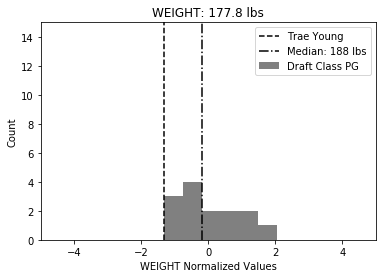

In [12]:
display_data(1629027, measurement_df, 'WEIGHT')

The figure above shows the weight distribution of point guards in the draft combine class, along with the lightest player (Trae Young) weight and the median weight signified by vertical lines. This visualization quickly communicates where on the distribution this player falls relative to players of the same position. Because of the potential for sparsity, the median helps provide additional context.

## Drill Data

Drill data give a snapshot of a player's agility and strength from a variety of tests. Because not all players participate in drills, the drill data will be normalized across all positions.

In [13]:
drill_df = draft_df[['PLAYER_ID', 'FULL_NAME', 'POSITION', 'BENCH_PRESS', 'LANE_AGILITY_TIME',
                     'MAX_VERTICAL_LEAP', 'MODIFIED_LANE_AGILITY_TIME', 'STANDING_VERTICAL_LEAP',
                     'THREE_QUARTER_SPRINT']]
primary_positions = [pos if '-' not in pos else pos.split('-')[0]
                     for pos in drill_df['POSITION']]

drill_df.loc[:, 'PRIMARY_POSITION'] = primary_positions
drill_df.head(20)

,PLAYER_ID,FULL_NAME,POSITION,BENCH_PRESS,LANE_AGILITY_TIME,MAX_VERTICAL_LEAP,MODIFIED_LANE_AGILITY_TIME,STANDING_VERTICAL_LEAP,THREE_QUARTER_SPRINT,PRIMARY_POSITION
0,1628959,Rawle Alkins,SG,10.0,11.50,40.5,3.09,32.5,3.15,SG
1,1628960,Grayson Allen,SG,NaN,10.31,40.5,3.04,32.5,3.15,SG
2,1628961,Kostas Antetokounmpo,PF,0.0,12.48,35.0,3.48,29.5,3.21,PF
3,1628962,Udoka Azubuike,C,11.0,12.97,31.5,3.65,31.0,3.12,C
4,1628964,Mohamed Bamba,C,NaN,NaN,NaN,NaN,NaN,NaN,C
5,1628965,Jaylen Barford,PG-SG,7.0,11.39,33.0,3.21,27.0,3.31,PG
6,1628966,Keita Bates-Diop,SG-SF,11.0,11.20,35.0,3.28,30.5,3.17,SG
7,1628967,Tyus Battle,SG,9.0,11.04,37.5,2.87,32.0,3.07,SG
8,1628968,Brian Bowen,SG-SF,0.0,11.58,34.0,3.33,30.5,3.28,SG
9,1628970,Miles Bridges,SF,NaN,NaN,NaN,NaN,NaN,NaN,SF


Examining `drill_df` shoes that some players have missing values, meaning that they likely did not participate in these drills. While unfortunate, dealing with missing data is a common task in data science. The cell below normalizes the drill values, while maintaining for missing values as `NaN`.

In [14]:
normed_drill_df = drill_df[['BENCH_PRESS', 'LANE_AGILITY_TIME',
                            'MAX_VERTICAL_LEAP', 'MODIFIED_LANE_AGILITY_TIME', 'STANDING_VERTICAL_LEAP',
                            'THREE_QUARTER_SPRINT']]

for col_name in list(normed_drill_df):
    normed_drill_df[col_name] = (drill_df[col_name] - np.mean(drill_df[col_name])) / np.std(drill_df[col_name])

normed_drill_df.columns = [orig_name + '_NORM' for orig_name in list(normed_drill_df)]
normed_drill_df.head(5)

,BENCH_PRESS_NORM,LANE_AGILITY_TIME_NORM,MAX_VERTICAL_LEAP_NORM,MODIFIED_LANE_AGILITY_TIME_NORM,STANDING_VERTICAL_LEAP_NORM,THREE_QUARTER_SPRINT_NORM
0,0.430529,0.285122,1.368888,-0.543105,1.186047,-0.551295
1,NaN,-1.859406,1.368888,-0.863927,1.186047,-0.551295
2,-1.643839,2.051204,-0.297584,1.959304,0.010496,0.119847
3,0.637966,2.934245,-1.358067,3.050098,0.598272,-0.886866
4,NaN,NaN,NaN,NaN,NaN,NaN


Once again, merging the normalized values into the original `drill_df` will allow for the visualization of drill data in the same manner. Because `display_data` is general, the same function should suffice.

In [15]:
drill_df = drill_df.merge(normed_drill_df, left_index=True, right_index=True)
drill_df.head(5)

,PLAYER_ID,FULL_NAME,POSITION,BENCH_PRESS,LANE_AGILITY_TIME,MAX_VERTICAL_LEAP,MODIFIED_LANE_AGILITY_TIME,STANDING_VERTICAL_LEAP,THREE_QUARTER_SPRINT,PRIMARY_POSITION,BENCH_PRESS_NORM,LANE_AGILITY_TIME_NORM,MAX_VERTICAL_LEAP_NORM,MODIFIED_LANE_AGILITY_TIME_NORM,STANDING_VERTICAL_LEAP_NORM,THREE_QUARTER_SPRINT_NORM
0,1628959,Rawle Alkins,SG,10.0,11.50,40.5,3.09,32.5,3.15,SG,0.430529,0.285122,1.368888,-0.543105,1.186047,-0.551295
1,1628960,Grayson Allen,SG,NaN,10.31,40.5,3.04,32.5,3.15,SG,NaN,-1.859406,1.368888,-0.863927,1.186047,-0.551295
2,1628961,Kostas Antetokounmpo,PF,0.0,12.48,35.0,3.48,29.5,3.21,PF,-1.643839,2.051204,-0.297584,1.959304,0.010496,0.119847
3,1628962,Udoka Azubuike,C,11.0,12.97,31.5,3.65,31.0,3.12,C,0.637966,2.934245,-1.358067,3.050098,0.598272,-0.886866
4,1628964,Mohamed Bamba,C,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN


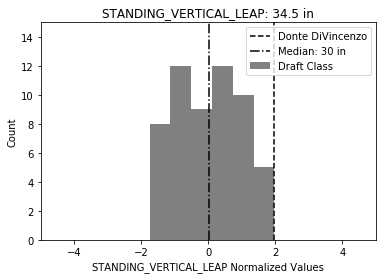

In [16]:
display_data(1628978, drill_df, 'STANDING_VERTICAL_LEAP', True)

The figure above shoes the distribution of `STANDING_VERTICAL_LEAP` for the entire 2018 draft class, along with the leader (Donte DiVincenzo) and the draft class median. DiVencenzo jumped 4.5 inches higher than the median athlete at the combine.